# In-silico perturbation

In the dynamo Cell paper :cite:p:`QIU2022`, we introduced the analytical form of a
vector field. This permits *in silico* perturbation predictions of expression
for each gene in each cell and the cell fate diversions after
genetic perturbations. In particular, we demonstrated the predictive
power of hematopoietic fate trajectory predictions after genetic
perturbations. 

In this tutorial, we will cover the following topics:
- Perturbation functionality and API in dynamo 
- How to perturb gene expression levels individually or collectively in hematopoietic scNT-seq dataset 
- Visualize gene perturbation effects 
- Reproduce results in dynamo paper Fig.7 :cite:p:`QIU2022` 

### Perturbation method introduction

Import relevant packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import Scribe as sb
import sys
import os

# import scanpy as sc
import dynamo as dyn
dyn.configuration.set_figure_params('dynamo', background='white')
dyn.dynamo_logger.main_silence()

In [3]:
adata_labeling = dyn.sample_data.hematopoiesis()

Take a glance at what is in ``adata`` object. All observations,
embedding layers and other data in ``adata`` are computed within
``dynamo``. Please refer to other dynamo tutorials regarding how to
obtain these values from the metadata and the raw new/total and (or) raw
spliced/unspliced gene expression values.

In [4]:
adata_labeling

AnnData object with n_obs × n_vars = 1947 × 1956
    obs: 'batch', 'time', 'cell_type', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'new_Size_Factor', 'initial_new_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase', 'leiden', 'control_point_pca', 'inlier_prob_pca', 'obs_vf_angle_pca', 'pca_ddhodge_div', 'pca_ddhodge_potential', 'acceleration_pca', 'curvature_pca', 'n_counts', 'mt_frac', 'jacobian_det_pca', 'manual_selection', 'divergence_pca', 'curv_leiden', 'curv_louvain', 'SPI1->GATA1_jacobian', 'jacobian', 'umap_ori_leiden', 'umap_ori_louvain', 'umap_ddhodge_div', 'umap_ddhodge_potential', 'curl_umap', 'divergence_umap', 'acceleration_umap', 'control_point_umap_ori', 'inlier_prob_umap_ori', 'obs_vf_angle_umap_ori', 'curvature_umap_ori'
    var: 'gene_name', 'gene_id', 'nCells', 'nCounts', 'pass_basic

## Perturb gene expression values
Here we apply ``dyn.pd.perturbation`` to the dataset by upregulating each gene and creating
visualization plots. In addition, multiple genes can be suppressed or activated
during perturbation simulation.
    




### Induce hematopoietic stem cells with selected TFs  
**Define sets of genes**
Let's define three sets of genes we explored in :cite:p:`QIU2022`. For example, during reprogramming committed murine blood cells to induced
  hematopoietic stem cells with defined factors, six transcription
  factors defined in ``murine_blood_cells`` below impart
  multilineage transplantation potential onto otherwise committed
  lymphoid and myeloid progenitors and myeloid effector cells. You can refer to :cite:p:`QIU2022` for more information about these genes.

In [5]:
murine_blood_cells = ["RUN1T1", "HLF", "LMO2", "PRDM5", "PBX1", "ZFP37", "MYCN", "MEIS1"]
gran_lineage_genes = ["CEBPE", "RUNX1T1", "KLF1", "CEBPA", "FOSB", "JUN", "SPI1", "ZC3HAV1"]
erythroid_differentiation = ["GATA1", "TAL1", "LMO2", "KLF1", "MYB", "LDB1", "NFE2", "GFI1B", "BCL11A"]

### Supress GATA1 and SPI1 genes individually

In the dynamo Cell paper :cite:p:`QIU2022`, we explored and reported the canonical PU.1/SPI1-GATA1 network motif with new strategies. The streamlines of SPI1 and GATA1 show that HSPCs bifurcate into GMP-like and MEP-like branches. Meanwhile, GATA1 is the master regulator of the GMP lineage. Here we select GATA1 and SPI1 for perturbation analysis example.

Suppression of GATA1 diverts cells from GMP-related lineages to
MEP-related lineages.

In [ ]:
gene = "GATA1"
dyn.pd.perturbation(adata_labeling, gene, [-100], emb_basis="umap")

|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected


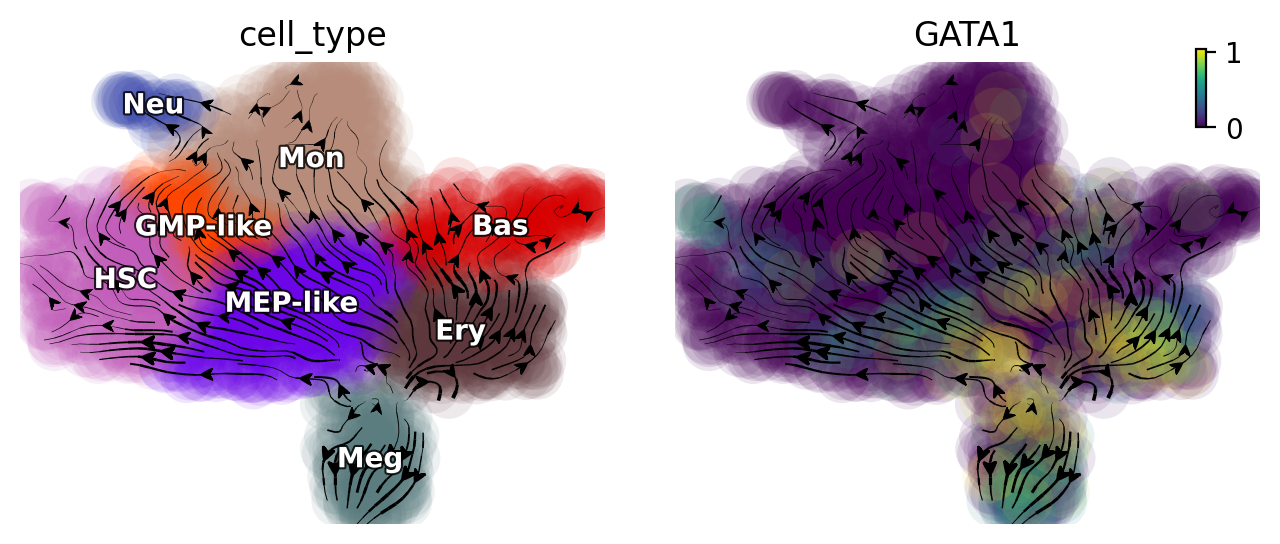

In [7]:
dyn.pl.streamline_plot(adata_labeling, color=["cell_type", gene], 
                       basis="umap_perturbation",figsize=(4,3))

Suppression of SPI1 diverts cells from MEP-related lineages to GMP-related lineages.

In [8]:
gene = "SPI1"
dyn.pd.perturbation(adata_labeling, gene, [-100], emb_basis="umap")

|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.8718s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected


|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected


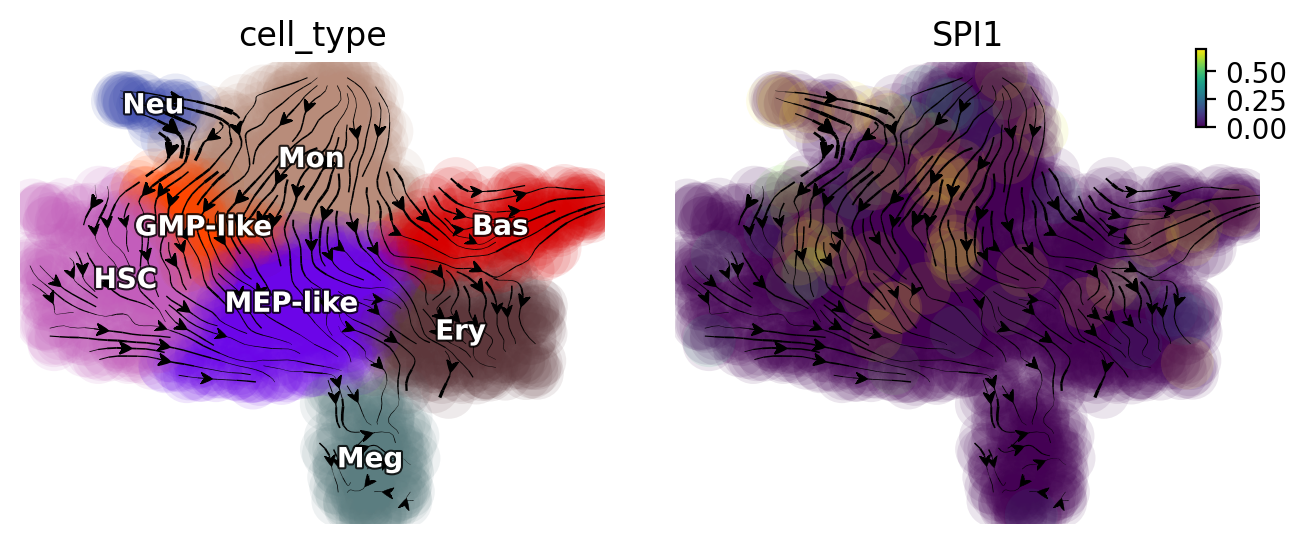

In [10]:
dyn.pl.streamline_plot(adata_labeling, color=["cell_type", gene], 
                       basis="umap_perturbation",figsize=(4,3))

### Supress SPI1/GATA at the same time  
 Suppression of both SPI1 and GATA1 traps cells in the progenitor states. This behavior is different from the cases in which we perturb SPI1 and GATA1 individually.

|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [1.1554s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected


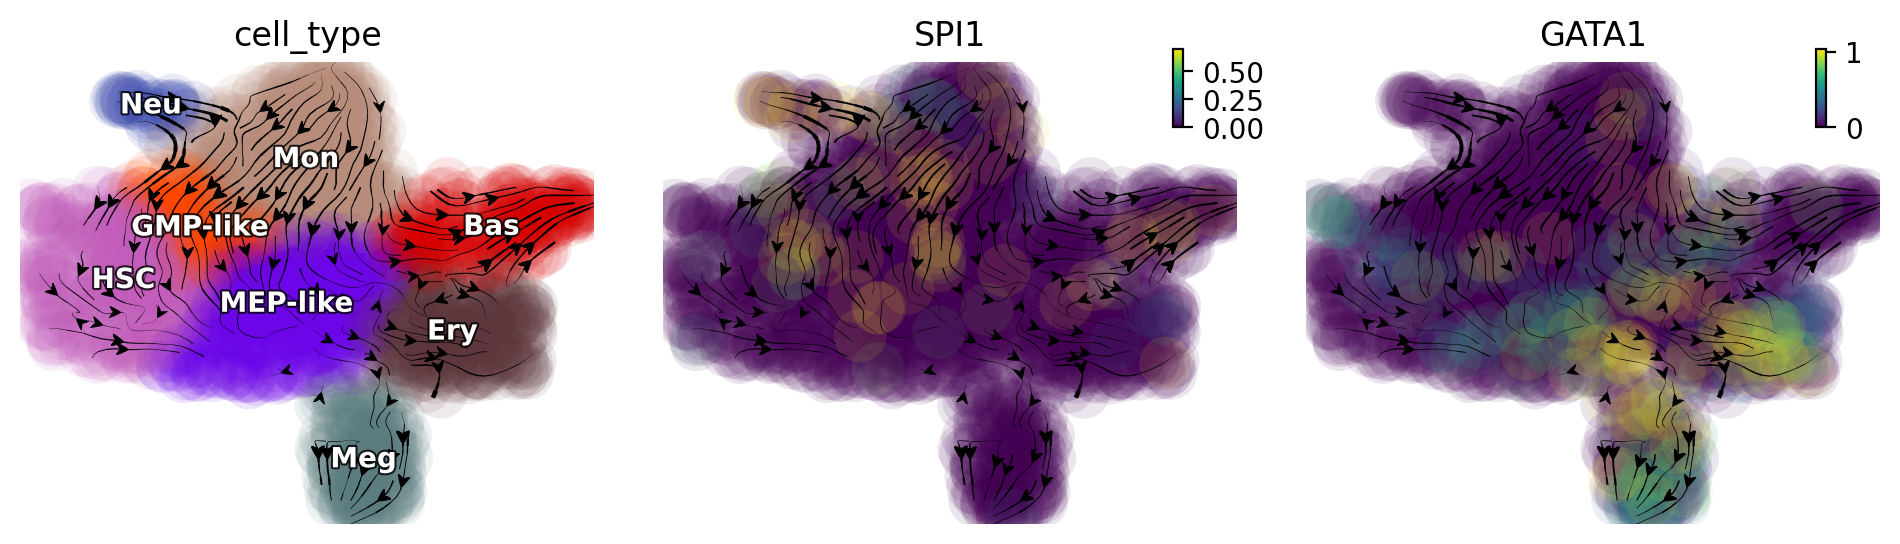

In [11]:
selected_genes =  [ "SPI1", "GATA1"]
# expr_vals = [-100, -100]
expr_vals = [-100, -15]
dyn.pd.perturbation(adata_labeling, selected_genes, expr_vals, emb_basis="umap")
dyn.pl.streamline_plot(adata_labeling, color=["cell_type"] + selected_genes, 
                       basis="umap_perturbation",figsize=(4,3))


### Activate KLF1
Dynamo *in silico* perturbation can correctly predicts other cellular transitions, showcased in :cite:p:`QIU2022`. Here is another example: activating KLF1 leads to conversion into erythroid cells, consistent with :cite:p:`Orkin2008-vp`.


|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [2.3166s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected


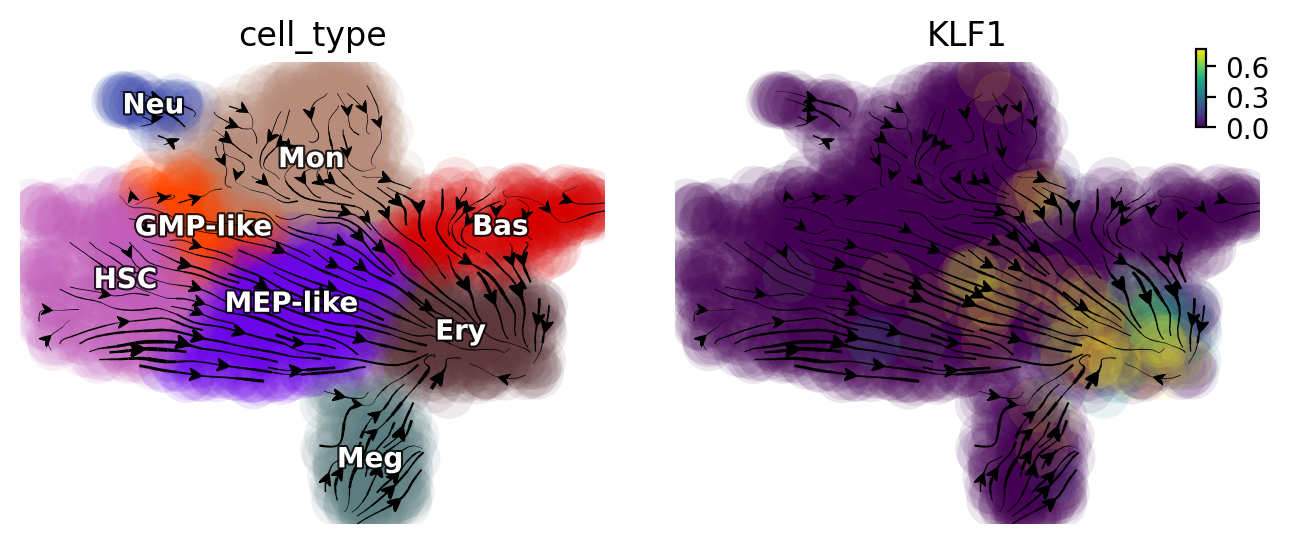

In [12]:
gene = "KLF1"
dyn.pd.perturbation(adata_labeling, gene, [100], emb_basis="umap")
dyn.pl.streamline_plot(adata_labeling, color=["cell_type", gene], 
                       basis="umap_perturbation",figsize=(4,3))

### Promote erythroid lineage: triple activation
Triple activation of GATA1, KLF1, and TAL1, known erythrocyte factors, and TFs used for reprogramming fibroblasts into erythrocytes, diverts most other cells into the Ery lineage (Capellera-Garcia et al., 2016).

|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [2.0410s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected


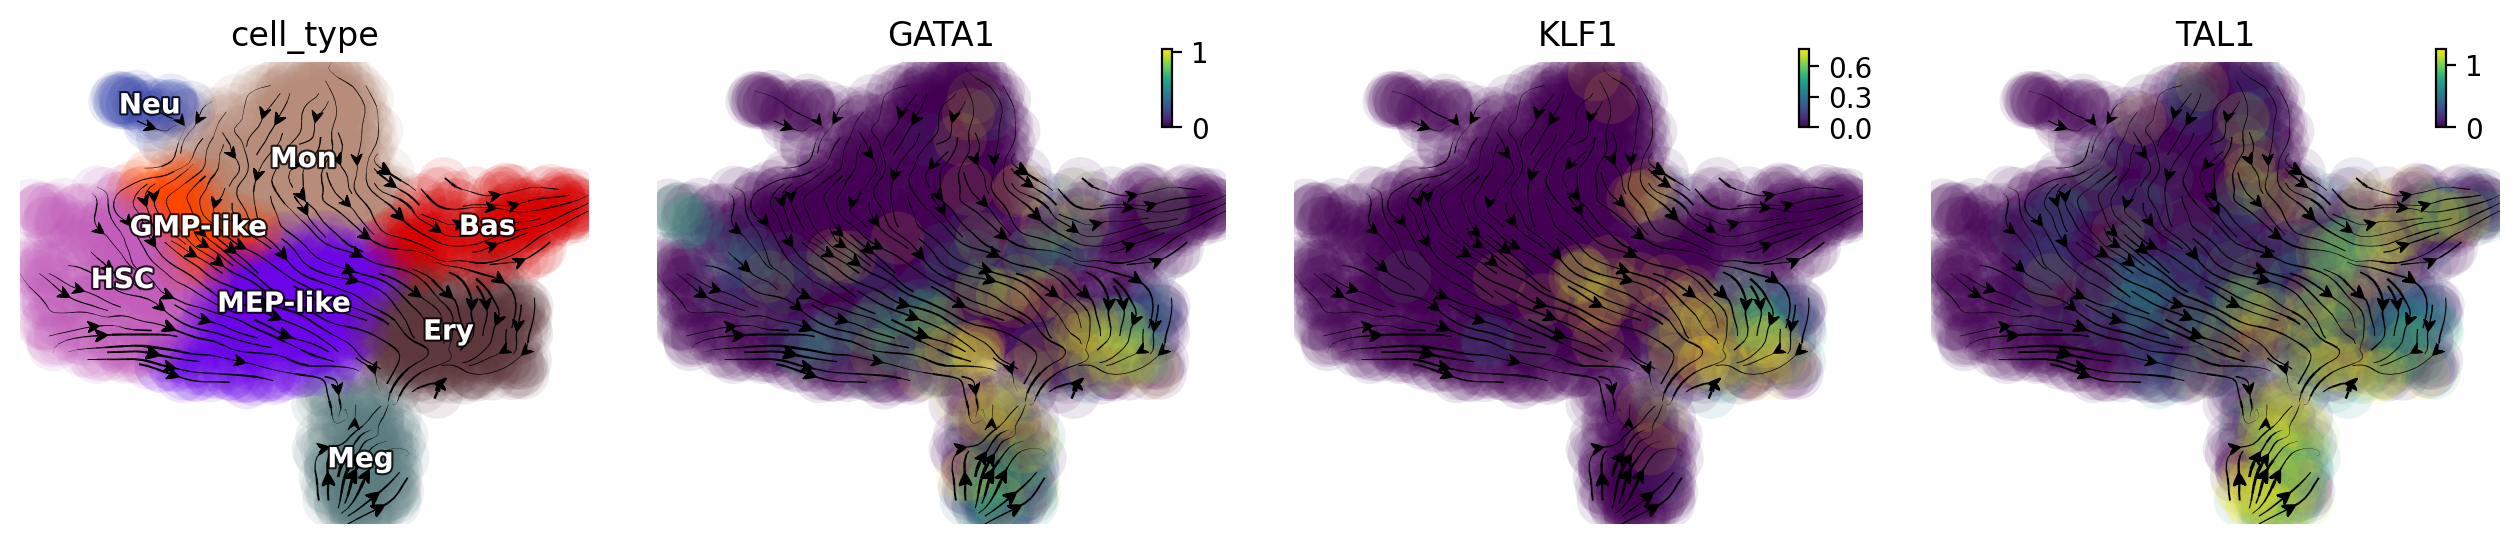

In [13]:
selected_genes =  ["GATA1", "KLF1", "TAL1"]
expr_vals = [100, 100, 100]
dyn.pd.perturbation(adata_labeling, selected_genes, expr_vals, emb_basis="umap")
dyn.pl.streamline_plot(adata_labeling, color=["cell_type"] + selected_genes, 
                       basis="umap_perturbation", figsize=(4, 3))
